In [3]:
import torch as th
import numpy as np

In [4]:
tensor_a = th.tensor([1,2,3,4])
tensor_b = th.tensor([5,6,7,8])

In [5]:
print(tensor_a + tensor_b)
print(tensor_a.add(tensor_b))
print(th.add(tensor_a, tensor_b))

tensor([ 6,  8, 10, 12])
tensor([ 6,  8, 10, 12])
tensor([ 6,  8, 10, 12])


In [6]:
tensor_b - tensor_a

tensor([4, 4, 4, 4])

In [7]:
tensor_a * tensor_b

tensor([ 5, 12, 21, 32])

In [8]:
tensor_b / tensor_a

tensor([5.0000, 3.0000, 2.3333, 2.0000])

In [9]:
tensor_b % tensor_a

tensor([0, 0, 1, 0])

In [10]:
th.pow(tensor_a, tensor_b)

tensor([    1,    64,  2187, 65536])

In [11]:
tensor_a.add(tensor_b)

tensor([ 6,  8, 10, 12])

In [12]:
tensor_a

tensor([1, 2, 3, 4])

In [13]:
tensor_a.add_(tensor_b)

tensor([ 6,  8, 10, 12])

In [14]:
tensor_a

tensor([ 6,  8, 10, 12])

# Create a Simple Neural Network

In [15]:
import torch as th
import torch.nn as nn
import torch.nn.functional as F

In [16]:
# Create a model class that inherits nn.Module
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.fc1 = nn.Linear(in_features, 16)
        self.fc2 = nn.Linear(16,8)
        self.out = nn.Linear(8,out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x

In [17]:
# pick a manual seed for randomization
th.manual_seed(42)
model = Model(4, 3)

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
path = r"C:/Users/Lenovo\Downloads/ML datasets/iris.csv"
df = pd.read_csv(path)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [20]:
df.variety = df['variety'].replace('Setosa', 0)
df.variety = df['variety'].replace('Versicolor', 1)
df.variety = df['variety'].replace('Virginica', 2)
df.tail()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1672\1879522224.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.variety = df['variety'].replace('Virginica', 2)


,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [21]:
X = df.drop('variety', axis='columns')
y = df.variety

In [22]:
# convert numpy arrays 
X = X.values
y = y.values

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
X_train = th.FloatTensor(X_train)
X_test = th.FloatTensor(X_test)

In [25]:
y_train = th.LongTensor(y_train)
y_test = th.LongTensor(y_test)

In [26]:
criterian = nn.CrossEntropyLoss()
optimizer = th.optim.Adam(model.parameters(), lr= 0.01)

In [27]:
epochs = 200
losses = []

for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterian(y_pred, y_train)
    losses.append(loss.detach().numpy())
    
    if i % 10 == 0:
        print(f'Epoch: {i} loss: {loss}')
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 loss: 1.0306873321533203
Epoch: 10 loss: 0.6999855637550354
Epoch: 20 loss: 0.481404572725296
Epoch: 30 loss: 0.3916228711605072
Epoch: 40 loss: 0.28457966446876526
Epoch: 50 loss: 0.17653164267539978
Epoch: 60 loss: 0.1095622330904007
Epoch: 70 loss: 0.08200477063655853
Epoch: 80 loss: 0.07030273973941803
Epoch: 90 loss: 0.0647367611527443
Epoch: 100 loss: 0.061533208936452866
Epoch: 110 loss: 0.05935528129339218
Epoch: 120 loss: 0.05770421773195267
Epoch: 130 loss: 0.05636388063430786
Epoch: 140 loss: 0.055225808173418045
Epoch: 150 loss: 0.054231464862823486
Epoch: 160 loss: 0.05334502458572388
Epoch: 170 loss: 0.05254386365413666
Epoch: 180 loss: 0.05181315913796425
Epoch: 190 loss: 0.051142118871212006


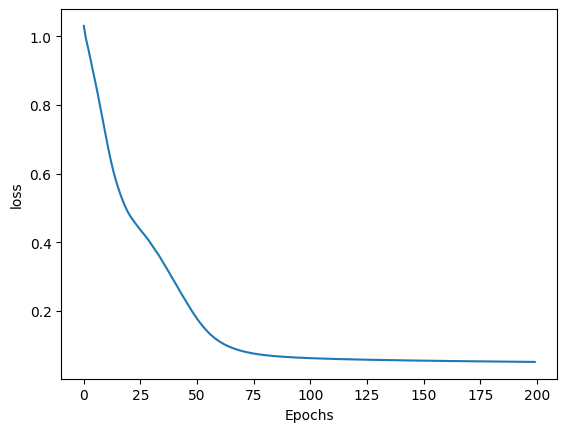

In [28]:
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

In [29]:
with th.no_grad():
    y_eval = model.forward(X_test)
    loss = criterian(y_eval, y_test)
    
loss

tensor(0.0343)

In [30]:
correct = 0
prediction = []
with th.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        
        # Will tell us what type of flower class our network thinks it is
        print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')
        prediction.append(y_val.argmax().item())

        # Correct or not
        if y_val.argmax().item() == y_test[i]:
            correct +=1

print(f'We got {correct} correct!')

1.)  tensor([-15.5685,   5.0244,  15.2446]) 	 2 	 2
2.)  tensor([  8.6360,   2.2598, -13.5913]) 	 0 	 0
3.)  tensor([ 10.3676,   1.8385, -15.7439]) 	 0 	 0
4.)  tensor([-17.4277,   5.4200,  17.1714]) 	 2 	 2
5.)  tensor([-9.7976,  5.4512,  8.2948]) 	 2 	 2
6.)  tensor([-5.0228,  6.5562,  2.0450]) 	 1 	 1
7.)  tensor([-2.9093,  7.6909, -1.1482]) 	 1 	 1
8.)  tensor([  9.1352,   1.9038, -14.0411]) 	 0 	 0
9.)  tensor([  9.0642,   2.0825, -14.0703]) 	 0 	 0
10.)  tensor([-11.0019,   5.6307,   9.5605]) 	 2 	 2
11.)  tensor([  9.4738,   2.1605, -14.7089]) 	 0 	 0
12.)  tensor([-12.8717,   5.5111,  11.8044]) 	 2 	 2
13.)  tensor([-17.8701,   5.4121,  17.6942]) 	 2 	 2
14.)  tensor([-11.4244,   4.7406,  10.6140]) 	 2 	 2
15.)  tensor([-0.6574,  5.9044, -3.0456]) 	 1 	 1
16.)  tensor([-4.9849,  6.6085,  1.9867]) 	 1 	 1
17.)  tensor([-2.3741,  6.5904, -1.1069]) 	 1 	 1
18.)  tensor([-2.8722,  6.1371, -0.1819]) 	 1 	 1
19.)  tensor([-12.9415,   5.2993,  11.9988]) 	 2 	 2
20.)  tensor([  8.8508,

In [31]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction)
cm

array([[ 9,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 10]], dtype=int64)

In [32]:
new_iris = th.tensor([4.7, 3.2, 1.3, 0.2])

In [33]:
with th.no_grad():
    y_new = (model.forward(new_iris))
    print(y_new)

tensor([  9.4735,   1.7198, -14.3876])


In [34]:
y_new.argmax()

tensor(0)

In [35]:
index = y_new.argmax().item()

In [37]:
targets = ['Setosa', 'Versicolor','Virginica']

print(targets[index])

Setosa
